# Plots

In this tutorial we will go through the different kinds of graphics and evaluation metrics, which can be calculated after the model is trained. 

First, we will look at a general analysis of the model. If a model is used, which shares the binding modes across all samples, we can plot those with `mb.pl.conv_mono(model)`. In the following we create an arbitrary model and plot only the random intialization.

In [1]:
import multibind as mb
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../../../annotations'
import torch
import torch.utils.data as tdata

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cpu



#activities
[[[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0., 0., 0., 0.]], requires_grad=True)


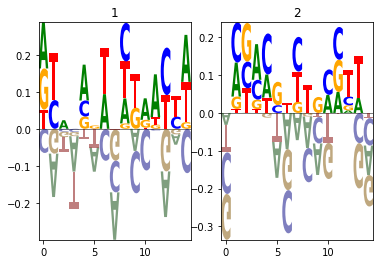

In [2]:
model = mb.models.Multibind(datatype="selex", n_rounds=4, n_kernels=3)
mb.pl.conv_mono(model)

For all other plots which are possible, we additionally need a dataset. For the purpose of demonstration we will use the CTCF_r3 dataset, which was also used for ProBound. We can load it using `bindome`:

In [3]:
df = mb.bindome.datasets.ProBound.ctcf(flank_length=0)
df

,seq,0,1
0,AAAAAAAGCCCGGAAATAGGCAACTTGTAG,0,1
1,AAAAAAAGGATGTTCCTAGCAACTTATAAA,1,0
2,AAAAAACAACGATAACCAACTGCTGCCGGA,0,1
3,AAAAAACACATGTATGAGTTTTTGATGGAG,1,0
4,AAAAAACCCTCCTTGGTGTCGGACGGCTAT,0,1
...,...,...,...
120091,TTTTTTTTCTTCATTGTTACAGTAGGTAGC,1,0
120092,TTTTTTTTGACTGCTTGGCTGGCTCCTGTG,1,0
120093,TTTTTTTTGGTCGGATTCGCTGTTGTTCAC,0,1
120094,TTTTTTTTTGAACCGGCCGCTCCTATGATC,1,0


In [7]:
dataset = mb.datasets.SelexDataset(df, n_rounds=1)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

We train the model with the training routine `mb.tl.train_iterative()`, which is implemented in `multibind`.

In [10]:
model, best_loss = mb.tl.train_iterative(train, device, n_kernels=2, num_epochs=500, 
                                         early_stopping=50, log_each=50)

Using device: cpu
next w 15 <class 'int'>
# rounds 1
# batches 1
# enr_series True

Kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0


kernels mask None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 500 early_stopping 50
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 51, Loss: 0.843951 , best epoch: 13 secs per epoch: 2.642 s
Epoch: 64, Loss: 0.8439 , best epoch: 13 secs per epoch: 2.663 s
early stop!
total time: 167.746 s
secs per epoch: 2.663 s

Kernel to optimize 1

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 1


kernels mask None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 500 early_stopping 50
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 51, Loss: 0.829866 , best epoch: 27 secs per epoch: 3.849 s
Epoch: 78, Loss: 0.8300 , best epoch: 27 s

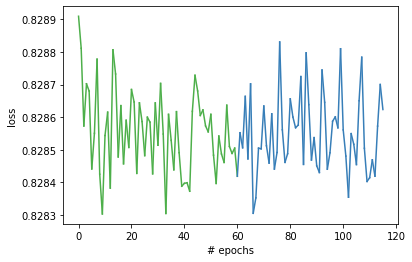

In [11]:
mb.pl.plot_loss(model)

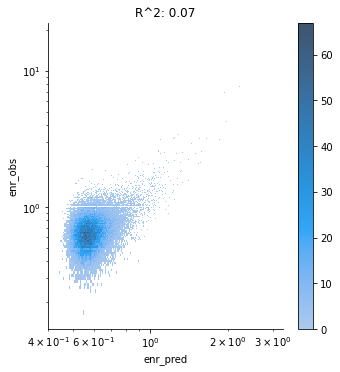

0.07156992418331032

In [12]:
mb.pl.kmer_enrichment(model, train)

For PBM data it does not make sense to calculate a kmer enrichment. Instead, we directly compute the $R^2$ values of the predictions, listing them per protein in each case. To demonstrate it, we will work again with a untrained model, so the values will natually look quite bad.

In [13]:
#TODO